# 1. 모듈 불러오기

In [1]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action = 'ignore')

# 데이터 전처리
import numpy as np
import pandas as pd

# 기계학습 모델 및 평가
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')

# 2. 데이터 불러오기

In [2]:
data = pd.read_csv('HousePrices.csv', index_col = 'Id')
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
data.T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,...,9,5,5,7,10,8,2,5,4,6
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,...,2009,2009,2006,2006,2009,2007,2010,2010,2010,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,New,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,...,Normal,Partial,Normal,Abnorml,Normal,Normal,Normal,Normal,Normal,Normal


In [4]:
data.shape

(1460, 80)

# 결측치, 데이터 타입 확인

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
for categ in ['MSSubClass', 'OverallQual', 'OverallCond']:
    data[categ] = data[categ].astype(str)

# target 값의 분포 확인

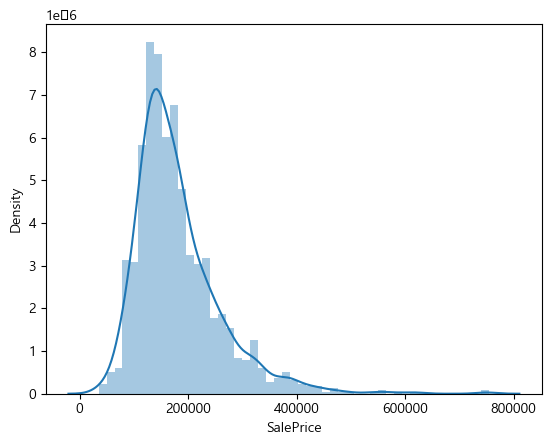

In [8]:
f = sns.distplot(data['SalePrice'])

# Train / Test 데이터 분리

In [9]:
X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

display(X.head(3))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2023)

# 결측치 처리

In [11]:
NaNinfo = X_train.isnull().sum()
NaNinfo = NaNinfo.sort_values(ascending = False)
NaNinfo = NaNinfo[NaNinfo > 0]
NaNinfo

PoolQC          1017
MiscFeature      981
Alley            958
Fence            820
FireplaceQu      498
LotFrontage      184
GarageType        61
GarageYrBlt       61
GarageQual        61
GarageCond        61
GarageFinish      61
BsmtFinType2      32
BsmtExposure      32
BsmtCond          31
BsmtFinType1      31
BsmtQual          31
MasVnrArea         5
MasVnrType         5
dtype: int64

In [12]:
for col in NaNinfo.index:
    print(f'{col} : {data[col].unique().tolist()[:10]}')

PoolQC : [nan, 'Ex', 'Fa', 'Gd']
MiscFeature : [nan, 'Shed', 'Gar2', 'Othr', 'TenC']
Alley : [nan, 'Grvl', 'Pave']
Fence : [nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']
FireplaceQu : [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po']
LotFrontage : [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0]
GarageType : ['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types']
GarageYrBlt : [2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993.0, 2004.0, 1973.0, 1931.0, 1939.0]
GarageQual : ['TA', 'Fa', 'Gd', nan, 'Ex', 'Po']
GarageCond : ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex']
GarageFinish : ['RFn', 'Unf', 'Fin', nan]
BsmtFinType2 : ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ']
BsmtExposure : ['No', 'Gd', 'Mn', 'Av', nan]
BsmtCond : ['TA', 'Gd', nan, 'Fa', 'Po']
BsmtFinType1 : ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ']
BsmtQual : ['Gd', 'TA', 'Ex', nan, 'Fa']
MasVnrArea : [196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0, 306.0, 212.0, 180.0]
MasVnrType : ['BrkFace', 'None', 'Stone', 'BrkCmn', nan]


- Target : SalePrice에 결측값이 있다면 해당 관측치는 제거
- Numerical : 평균값으로 대체
- Categorical : 'NaN'으로 대체

In [13]:
for feature in ['LotFrontage', 'LotArea', 'MasVnrArea',
                'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                'ScreenPorch', 'PoolArea','MiscVal']:
    X_train[feature] = X_train[feature].fillna(X_train[feature].mean())
    X_test[feature] = X_test[feature].fillna(X_train[feature].mean())
    
for feature in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
                'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
                'Electrical', 'MSZoning', 'Functional', 'Utilities', 'KitchenQual',
                'SaleType', 'Exterior1st', 'Exterior2nd','MasVnrType']:
    X_train[feature] = X_train[feature].fillna('NaN')
    X_test[feature] = X_test[feature].fillna('NaN')

- data 타입별로 변수명 묶기
- 카테고리 변수명만 뽑아내기

In [14]:
category = list(X_train.select_dtypes(include = [object]))
category[:10]

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood']

In [15]:
vec = DictVectorizer()
vec.fit(X_train[category].to_dict('records'))

scaler = StandardScaler()
scaler.fit(X_train.drop(category, axis=1))

StandardScaler()

In [16]:
X_category = vec.transform(X_train[category].to_dict('records'))
X_train_category = pd.DataFrame(X_category.toarray(), columns=vec.feature_names_)
display(X_train_category.head())

X_train_without_category = X_train.drop(category, axis=1)
X_scale = scaler.transform(X_train_without_category)
X_train_scale = pd.DataFrame(X_scale, columns=X_train_without_category.columns)
display(X_train_scale.head())

,Alley=Grvl,Alley=NaN,Alley=Pave,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,BldgType=Twnhs,BldgType=TwnhsE,BsmtCond=Fa,BsmtCond=Gd,...,SaleType=Con,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.041069,-0.270014,-0.180300,-0.896219,0.877029,0.133889,-0.283467,-0.934539,-0.862013,-1.287265,...,-0.071629,0.792998,1.098830,-0.360812,-0.119052,-0.275722,-0.069294,-0.08793,0.234973,-1.371255
1,0.003167,-0.010036,-0.010406,0.993008,-0.138073,-0.215765,-0.283467,-1.226590,-1.508003,-1.506280,...,-0.844131,-0.445978,-0.715176,-0.360812,-0.119052,-0.275722,-0.069294,-0.08793,2.068118,-0.615364
2,-0.129542,-0.155034,-1.131703,-1.283753,-0.590456,0.515720,-0.283467,-0.985940,-0.512102,-0.880523,...,-0.844131,-0.729403,-0.715176,-0.360812,-0.119052,-0.275722,-0.069294,-0.08793,-0.498286,0.896419
3,0.666714,0.319717,1.042933,0.847683,-0.590456,-0.964411,-0.283467,0.978981,-0.173406,-0.419026,...,-0.174629,0.363810,-0.715176,-0.360812,-0.119052,-0.275722,-0.069294,-0.08793,-0.864915,1.652311
4,-0.439197,-0.138685,-0.486108,1.041450,-0.049804,-0.964411,-0.283467,-1.280328,-2.342406,0.485715,...,-1.012677,0.209951,-0.715176,-0.360812,5.776169,-0.275722,-0.069294,-0.08793,-0.131656,-0.615364


In [17]:
X_train_final = pd.concat([X_train_scale, X_train_category], axis=1)
X_train_final.tail()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType=Con,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub
1017,-0.218015,-0.309324,-0.146321,-0.847778,-0.259444,-0.037720,-0.283467,-0.205579,-0.341633,-0.682366,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1018,1.064843,0.143628,1.280783,1.186775,1.092187,2.115979,-0.283467,0.051426,2.157091,2.258695,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1019,-0.704616,0.285768,0.533252,0.121057,-0.193242,1.137805,-0.040855,-1.065378,0.151832,-0.043572,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1020,-0.306488,-0.117511,0.159487,-0.411802,-0.590456,2.480649,-0.283467,-0.995286,1.533532,1.497356,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1021,0.000000,-0.331927,-0.316214,1.235217,-0.590456,0.449222,-0.283467,-0.390155,-0.009666,-0.296482,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [18]:
X_category = vec.transform(X_test[category].to_dict('records'))
X_test_category = pd.DataFrame(X_category.toarray(), columns=vec.feature_names_)
display(X_test_category.head())

X_test_without_category = X_test.drop(category, axis=1)
X_scale = scaler.transform(X_test_without_category)
X_test_scale = pd.DataFrame(X_scale, columns=X_test_without_category.columns)
display(X_test_scale.head())

,Alley=Grvl,Alley=NaN,Alley=Pave,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,BldgType=Twnhs,BldgType=TwnhsE,BsmtCond=Fa,BsmtCond=Gd,...,SaleType=Con,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.439197,0.016766,-1.947191,-0.702452,-0.590456,-0.127815,-0.283467,-0.135487,-0.368549,-0.713654,...,-0.694312,-0.729403,5.012381,-0.360812,-0.119052,-0.275722,-0.069294,-0.08793,1.334860,-1.371255
1,-0.439197,-0.304857,-2.083106,1.041450,-0.590456,-0.434567,2.536898,-0.556040,-0.050040,-0.343414,...,-0.881586,-0.729403,-0.211286,3.440040,-0.119052,-0.275722,-0.069294,-0.08793,-0.131656,0.896419
2,0.000000,-0.032728,-0.214278,0.799241,-0.590456,0.425625,-0.283467,-1.280328,-0.888929,-0.505068,...,-0.488312,-0.016790,-0.715176,-0.360812,-0.119052,-0.275722,-0.069294,-0.08793,-0.498286,-1.371255
3,0.000000,-0.552685,1.110890,0.944566,0.220523,0.530736,-0.283467,-0.927530,-0.440325,-0.797088,...,-0.226130,0.477181,-0.715176,-0.360812,-0.119052,-0.275722,-0.069294,-0.08793,-0.498286,0.140528
4,-0.439197,-0.304857,-1.131703,0.508591,-0.590456,-0.964411,-0.283467,0.595810,-0.541261,-0.914418,...,-0.801994,-0.729403,0.376587,2.834594,-0.119052,-0.275722,-0.069294,-0.08793,0.234973,-1.371255


In [19]:
X_test_final = pd.concat([X_test_scale, X_test_category], axis=1)
X_test_final.tail()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType=Con,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub
433,-0.041069,-0.113938,0.873039,0.605474,-0.590456,0.425625,-0.283467,-0.869119,-0.494158,-0.648471,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
434,-0.439197,-0.646313,-0.859873,0.363266,-0.590456,-0.964411,-0.283467,0.240675,-0.882200,-1.164721,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
435,0.666714,-0.127339,1.280783,1.186775,0.303276,1.440267,-0.283467,0.226657,1.618767,1.596434,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
436,0.887897,-0.465668,-1.743319,-1.671287,-0.590456,-0.288699,0.353390,-0.299035,-0.458270,-0.817947,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
437,-0.439197,0.016766,-2.932572,0.508591,-0.590456,-0.964411,-0.283467,0.217311,-0.904631,-0.278231,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [20]:
X_train, y_train = X_train_final.values, y_train.values
X_test, y_test = X_test_final.values, y_test.values

# 3. 모델링

In [21]:
model_LR = LinearRegression(n_jobs = -1)
model_LR.fit(X_train, y_train)
display(pd.DataFrame(model_LR.coef_,
                    index = X_test_final.columns, columns = ['Linear regression 계수']))

,Linear regression 계수
LotFrontage,1.915689e+03
LotArea,6.390461e+03
YearBuilt,9.146180e+03
YearRemodAdd,1.208111e+03
MasVnrArea,2.076264e+03
...,...
SaleType=Oth,-1.888529e+15
SaleType=WD,-1.888529e+15
Street=Grvl,5.836853e+14
Street=Pave,5.836853e+14


In [22]:
model_Lasso1 = Lasso(alpha=0.0001,random_state=1)
model_Lasso2 = Lasso(alpha=100.0,random_state=1)
model_Ridge1 = Ridge(alpha=0.0001, random_state=1)
model_Ridge2 = Ridge(alpha=100.0, random_state=1)

model_Lasso1.fit(X_train, y_train)
model_Lasso2.fit(X_train, y_train)
model_Ridge1.fit(X_train, y_train)
model_Ridge2.fit(X_train, y_train)

Ridge(alpha=100.0, random_state=1)

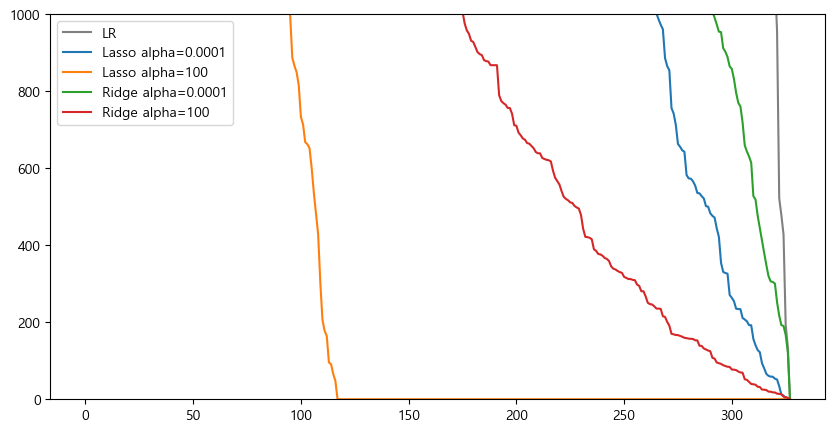

In [23]:
plt.figure(figsize=(10,5))
plt.plot(sorted(np.abs(model_LR.coef_))[::-1], label='LR', c='gray')
plt.plot(sorted(np.abs(model_Lasso1.coef_))[::-1], label='Lasso alpha=0.0001')
plt.plot(sorted(np.abs(model_Lasso2.coef_))[::-1], label='Lasso alpha=100')
plt.plot(sorted(np.abs(model_Ridge1.coef_))[::-1], label='Ridge alpha=0.0001')
plt.plot(sorted(np.abs(model_Ridge2.coef_))[::-1], label='Ridge alpha=100')
plt.legend()
plt.ylim((-0.1,1000)) # 50000
plt.show()

# 교차검증을 통한 하이퍼파라미터 찾기

In [24]:
cv = 5 # number of folds for cross validation
max_iter = 5000

n_trials = 50
def myrange(start, end, step):
    r = start
    while(r<end):
        yield r
        r += step
        
alpha_list = list(reversed([round(i,2) for i in myrange(0.01,10,0.1)]))

- 모델 학습

In [25]:
model_Lasso = LassoCV(alphas=alpha_list, cv=cv, n_jobs=-1, random_state=1, max_iter=max_iter)
model_Lasso.fit(X_train, y_train)

LassoCV(alphas=[9.91, 9.81, 9.71, 9.61, 9.51, 9.41, 9.31, 9.21, 9.11, 9.01,
                8.91, 8.81, 8.71, 8.61, 8.51, 8.41, 8.31, 8.21, 8.11, 8.01,
                7.91, 7.81, 7.71, 7.61, 7.51, 7.41, 7.31, 7.21, 7.11, 7.01, ...],
        cv=5, max_iter=5000, n_jobs=-1, random_state=1)

In [26]:
model_Lasso.alpha_

9.81

- 학습된 모델 사용 예측값 출력

In [27]:
pred_train_LR = model_LR.predict(X_train)
pred_test_LR = model_LR.predict(X_test)
pred_train_Lasso = model_Lasso.predict(X_train)
pred_test_Lasso = model_Lasso.predict(X_test)

- 학습/테스트 예측 결과 성능 출력

In [28]:
train_rmse_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))
train_mae_LR =  mean_absolute_error(y_train, pred_train_LR)
train_r2_LR = r2_score(y_train, pred_train_LR)

test_rmse_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))
test_mae_LR =  mean_absolute_error(y_test, pred_test_LR)
test_r2_LR = r2_score(y_test, pred_test_LR)

train_rmse_Lasso = np.sqrt(mean_squared_error(y_train, pred_train_Lasso))
train_mae_Lasso =  mean_absolute_error(y_train, pred_train_Lasso)
train_r2_Lasso = r2_score(y_train, pred_train_Lasso)

test_rmse_Lasso = np.sqrt(mean_squared_error(y_test, pred_test_Lasso))
test_mae_Lasso =  mean_absolute_error(y_test, pred_test_Lasso)
test_r2_Lasso = r2_score(y_test, pred_test_Lasso)

In [29]:
results = pd.DataFrame(index=['rmse','mae','r2'],columns=['LR train','LR test','Lasso train','Lasso test'])

In [30]:
results.loc['rmse','LR train']=train_rmse_LR
results.loc['mae','LR train']=train_mae_LR
results.loc['r2','LR train']=train_r2_LR

results.loc['rmse','LR test']=test_rmse_LR
results.loc['mae','LR test']=test_mae_LR
results.loc['r2','LR test']=test_r2_LR

results.loc['rmse','Lasso train']=train_rmse_Lasso
results.loc['mae','Lasso train']=train_mae_Lasso
results.loc['r2','Lasso train']=train_r2_Lasso

results.loc['rmse','Lasso test']=test_rmse_Lasso
results.loc['mae','Lasso test']=test_mae_Lasso
results.loc['r2','Lasso test']=test_r2_Lasso

In [31]:
results

,LR train,LR test,Lasso train,Lasso test
rmse,16833.476055,70473100939510.75,17113.890159,34392.699581
mae,11227.490215,6742456832951.298828,11576.307365,17704.050188
r2,0.954086,-752672708339848320.0,0.952544,0.820736


### k 폴드 교차검증으로 하이퍼 파라미터 찾기 + 모델 비교 선택

In [32]:
# dict with optimal models
models = {} # dict()

# find optimal value of alpha 
n_trials = 20
alpha_list = 10 ** np.linspace(-3, 3, n_trials)

# number of folds for cross validation
cv = 5

# find optimal value of l1 (for ElasticNet)        
alpha_list = list(reversed([round(i,2) for i in myrange(0.01,10,0.1)]))
l1_list = list(reversed([round(i,2) for i in myrange(0,1,0.1)]))

max_iter = 5000

In [33]:
# find optimal Lasso model
model = LassoCV(alphas=alpha_list, cv=cv, n_jobs=-1, random_state=1, max_iter=max_iter)
model.fit(X_train, y_train)
models['Lasso'] = Lasso(alpha=model.alpha_, max_iter=max_iter)

In [34]:
# find optimal Ridge model
model = RidgeCV(alphas=alpha_list, cv=cv)
model.fit(X_train, y_train)
models['Ridge'] = Ridge(alpha=model.alpha_)

In [35]:
# find optimal ElasticNet model
model = ElasticNetCV(alphas=alpha_list, l1_ratio=l1_list,
                   cv=cv, random_state=1, n_jobs=-1, max_iter=max_iter)
model.fit(X_train, y_train)
models['ElasticNet'] = ElasticNet(alpha=model.alpha_, l1_ratio=model.l1_ratio_, max_iter=max_iter)

In [36]:
for name in models.keys():
    print(models[name])
    print('-'*100)

Lasso(alpha=9.81, max_iter=5000)
----------------------------------------------------------------------------------------------------
Ridge(alpha=9.91)
----------------------------------------------------------------------------------------------------
ElasticNet(alpha=9.81, l1_ratio=1.0, max_iter=5000)
----------------------------------------------------------------------------------------------------


# 모델 비교 선택

In [37]:
kf = KFold(cv, shuffle=True, random_state=1)
kf

KFold(n_splits=5, random_state=1, shuffle=True)

In [38]:
score = {}
for name in models.keys():
    # save score for each model
    if name not in score:
        score[name] = []

    # 모델
    reg = models[name]
    for i_train, i_valid in kf.split(X_train):
        # 학습
        reg.fit(X_train[i_train], y_train[i_train])
        # 예측
        y_pred = reg.predict(X_train[i_valid])
        RMSE = np.sqrt(mean_squared_error(y_train[i_valid], y_pred))
        score[name].append(RMSE)

In [39]:
score

{'Lasso': [58730.03492041581,
  22391.27532353902,
  30044.870227681025,
  23247.270246176147,
  76747.54260436278],
 'Ridge': [60588.45116394269,
  24923.34731096664,
  33292.36034962034,
  33729.14506929875,
  27020.888188143632],
 'ElasticNet': [58730.03492041581,
  22391.27532353902,
  30044.870227681025,
  23247.270246176147,
  76747.54260436278]}

In [40]:
results = pd.DataFrame(score)
results

,Lasso,Ridge,ElasticNet
0,58730.034920,60588.451164,58730.034920
1,22391.275324,24923.347311,22391.275324
2,30044.870228,33292.360350,30044.870228
3,23247.270246,33729.145069,23247.270246
4,76747.542604,27020.888188,76747.542604


,mean,std
Lasso,42232.198664,24321.329574
Ridge,35910.838416,14320.937120
ElasticNet,42232.198664,24321.329574


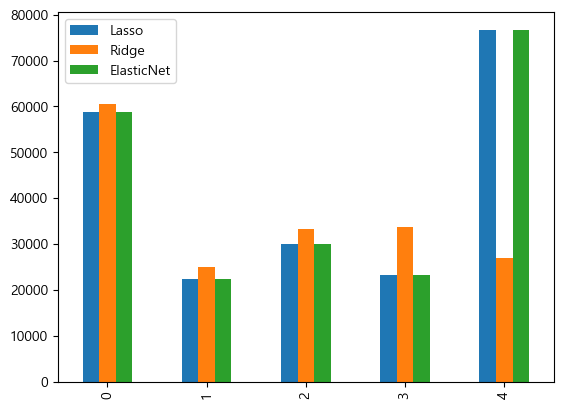

In [41]:
ax = results.plot.bar()
pd.concat([results.mean(), results.std()], axis=1, keys=['mean', 'std'])

In [42]:
model = models['ElasticNet'].fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [43]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
print(f'train rmse : {rmse_train:.4f}')
print(f'test rmse : {rmse_test:.4f}')

train rmse : 17113.8902
test rmse : 34392.6996


In [44]:
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f'train r2 : {r2_train:.4f}')
print(f'test r2 : {r2_test:.4f}')

train r2 : 0.9525
test r2 : 0.8207


# 예측 결과 plotting

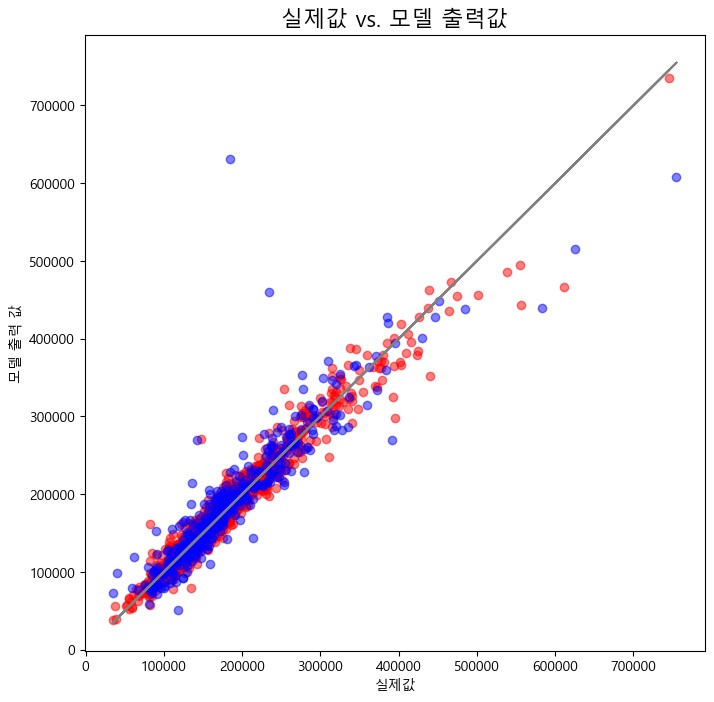

In [45]:
plt.figure(figsize=(8, 8))
plt.title('실제값 vs. 모델 출력값',fontsize=16)
plt.scatter(y_train, pred_train, c='red', alpha=0.5) # alpha 투명도 0일수록 투명
plt.scatter(y_test, pred_test, c='blue', alpha=0.5)
plt.plot(y_test,y_test, c='gray')
plt.plot(y_train,y_train, c='gray')
plt.xlabel('실제값', size=10)
plt.ylabel('모델 출력 값', size=10)
plt.show()

#  계수값을 변수 중요도로 생각하기

In [46]:
model = models['ElasticNet'].fit(X_train, y_train)

coef_df = pd.DataFrame(model.coef_.reshape(-1,1), index=X_test_final.columns, columns=['coefficients'])
coef_df.to_csv('coef.csv')
coef_df

,coefficients
LotFrontage,1.724586e+03
LotArea,5.143527e+03
YearBuilt,1.007055e+04
YearRemodAdd,1.127068e+03
MasVnrArea,2.223372e+03
...,...
SaleType=Oth,1.404758e+03
SaleType=WD,-4.843738e+03
Street=Grvl,-4.181677e+04
Street=Pave,8.938939e-10


In [47]:
# Sort: descending order
coefficents = np.abs(coef_df.coefficients)
index = np.argsort(coefficents)[::-1]
print(index)

Utilities=AllPub    296
Street=Pave         292
Street=Grvl         280
SaleType=WD         288
SaleType=Oth        244
                   ... 
MasVnrArea          102
YearRemodAdd        213
YearBuilt           211
LotArea             210
LotFrontage         327
Name: coefficients, Length: 328, dtype: int64


In [48]:
importance =  coefficents[index]
columns = [list(coef_df.index)[i] for i in index]

In [49]:
importance = importance[importance > 0]

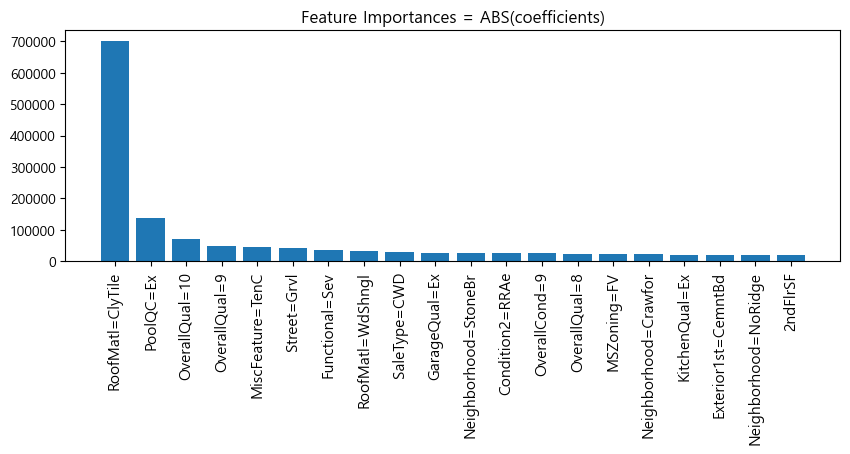

In [50]:
num_print = 20

plt.figure(figsize=(10,3))
plt.title('Feature Importances = ABS(coefficients)')
plt.bar(range(num_print),
        importance[:num_print],
        align='center')
plt.xticks(range(num_print), columns[:num_print], rotation=90, fontsize=11)
plt.show()